# <center><font color='blue'> Indian Premier League </font></center>

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.


The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2019 was ₹475 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy.


There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season. The 2020 season has been indefinitely suspended due to the ongoing COVID-19 pandemic
.

# Introduction

1. Importing the Dataset
2. Data Cleaning
3. Exploratory Data Analysis
    - Number of matches per sessions
    - Most number of winning team
    - Is Toss Winner Also the Match Winner?
    - Top cities where the matches are held
    - Favorite Grounds
    - Top cities where the matches are held
    - Toss Decisions
    - Maximum Toss Winners
    - Maximum Man Of Matches
    - Winning Year
    - Top players of the IPL
    - Most boundries of the player


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline
import os

In [4]:
path0 = 'deliveries.csv'
path1 = 'matches.csv'

In [5]:
score = pd.read_csv(path0)
match = pd.read_csv(path1)
match.head()
# print(match.shape)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
score.head()
# print(score.shape)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
score.shape

(150460, 21)

In [9]:
score.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# Data Cleaning

In [10]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [11]:
match.shape

(636, 18)

<AxesSubplot:>

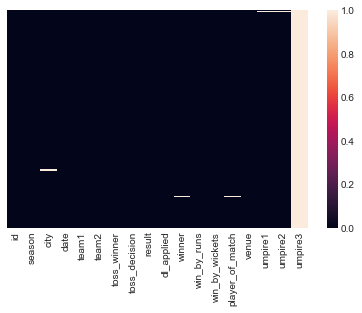

In [12]:
sns.heatmap(match.isnull(), yticklabels = False)  #checking NULl Values via graph,where you can find yellow colour which means that column contains NUll values

**Since umpire3 contains all null values we can remove the column**

In [13]:
match.drop('umpire3',axis = 1, inplace=True)

In [14]:
score.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

player_dismissed, dismissal_kind, fielder have null values because not on every ball a player is out


get list of team names and replace with short forms



In [15]:
match['team1'].unique()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

**Replace the team name with its short form**

In [16]:
match.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

score.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SR','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'],inplace = True)

# Exploratory Data Analysis

In [17]:
df=match.iloc[[match['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


Mumbai Indians(MI) defeated Delhi Daredevils(DD) with the highest run difference

In [18]:
df=match.iloc[[match['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


Kolkata Knight Riders(KKR) defeated Gujarat Lions(GL) with the highest wickets difference

### Number of matches per sessions

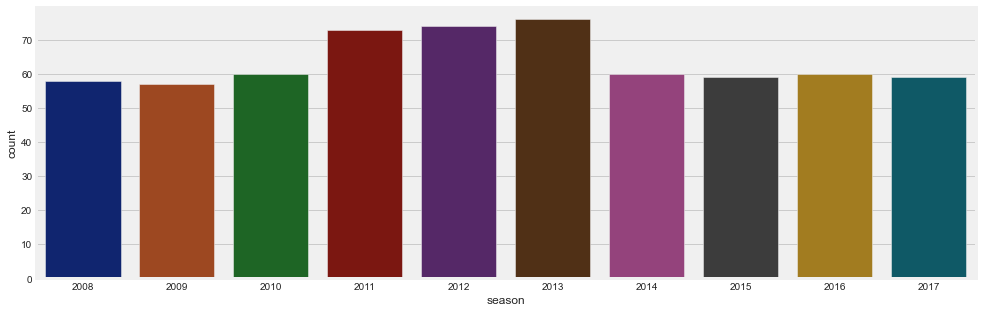

In [19]:
# lets see how many matches are being played every season
plt.subplots(figsize=(15,5))
sns.countplot(x = 'season', data = match, palette = 'dark')
plt.show()

The year 2013 has most number of matches and 2010 less number of matches 

### Most number of winning team

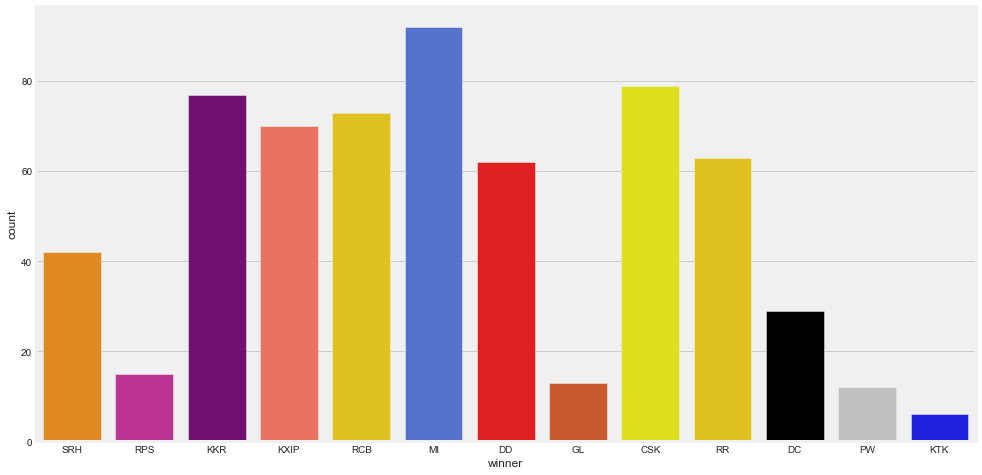

In [20]:
# By this graph you ca nsee that Mumbai Indians have won most of the matches in the IPL
plt.figure(figsize=(15,8))
sns.countplot(x = 'winner', data = match, palette = ['darkorange','#d11d9b','purple',
                                                       'tomato','gold','royalblue','red','#e04f16','yellow','gold'
                                                       ,'black','silver','b'])
plt.show()

### Is Toss Winner Also the Match Winner?

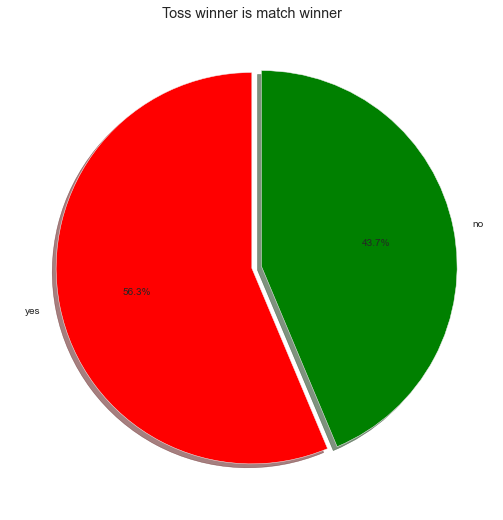

In [21]:
df=match[match['toss_winner']==match['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Toss winner is match winner")
plt.show()

It is not really the case it seems. The chance is 50-50 for both the teams.


###  Favorite Grounds

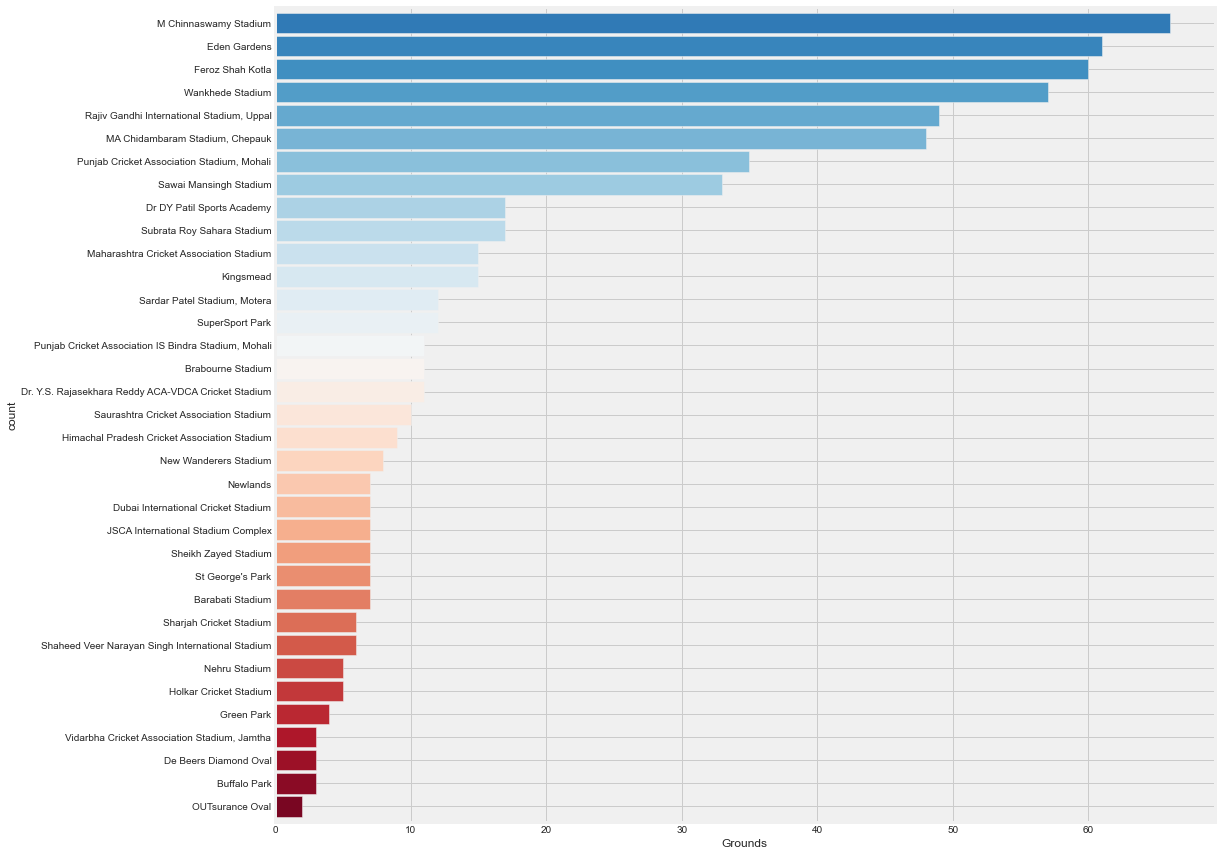

In [22]:
plt.subplots(figsize=(15,15))
ax = match['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('RdBu',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

### Top cities where the matches are held

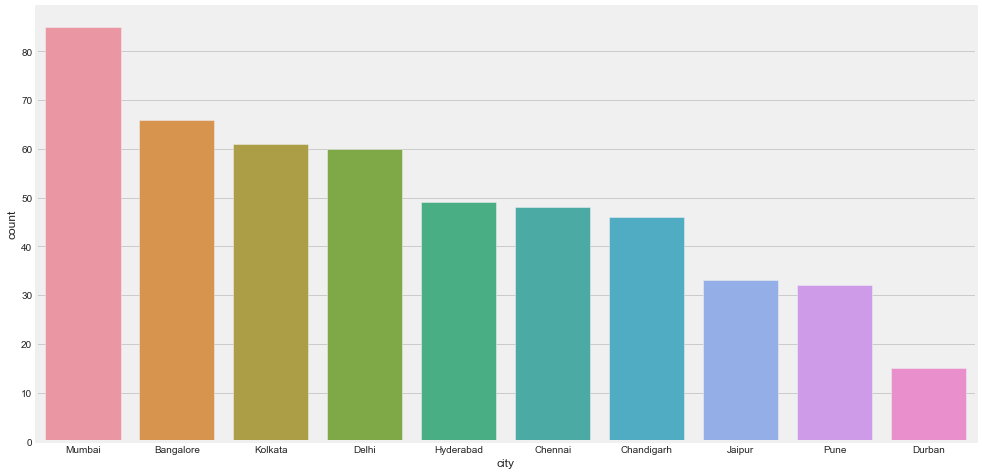

In [23]:
# Top cities where the matches are held
plt.figure(figsize=(15,8))
fav_cities = match['city'].value_counts().reset_index()
fav_cities.columns = ['city','count']
sns.barplot(y = 'count',x = 'city', data = fav_cities[:10])
plt.show()

Mumbai is the top city where most number of matches have occured

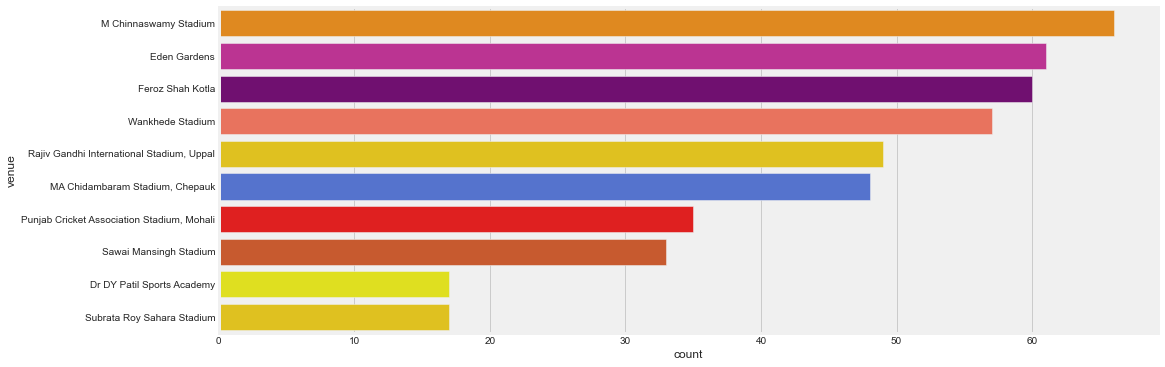

In [24]:
plt.figure(figsize=(15,6))
fav_ground = match['venue'].value_counts().reset_index()
fav_ground.columns = ['venue','count']
sns.barplot(x = 'count',y = 'venue', data = fav_ground[:10], palette = ['darkorange','#d11d9b','purple',
                                                       'tomato','gold','royalblue','red','#e04f16','yellow','gold'
                                                       ])
plt.show()

### Toss Decisions

In [25]:
print('Toss Decisions in %\n',((match['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


**Toss Decisions across Seasons**

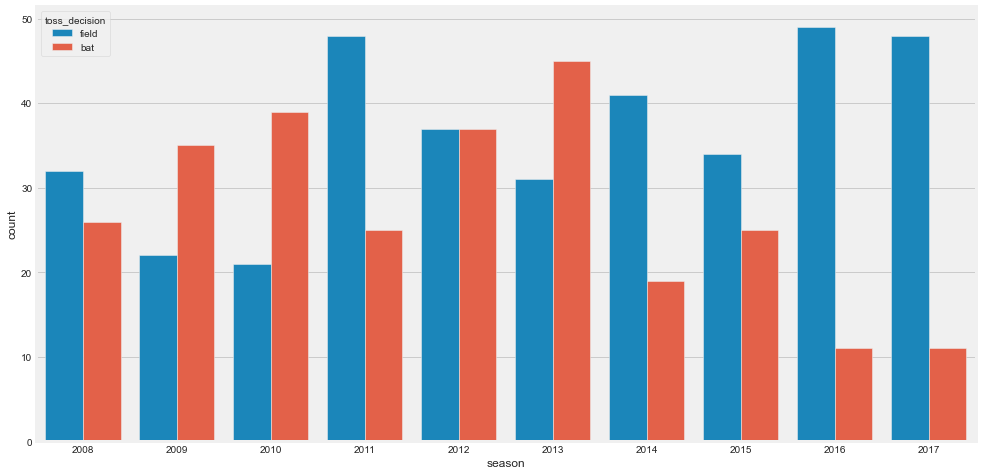

In [26]:
plt.subplots(figsize=(15,8))
sns.countplot(x='season',hue='toss_decision',data=match)
plt.show()


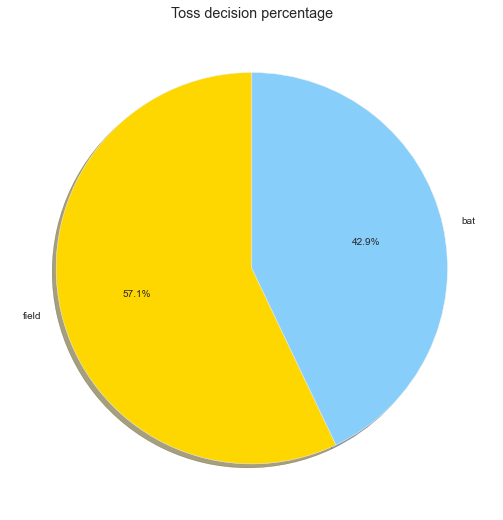

In [27]:
plt.subplots(figsize=(15,9))
temp_series = match.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution.

###  Maximum Toss Winners

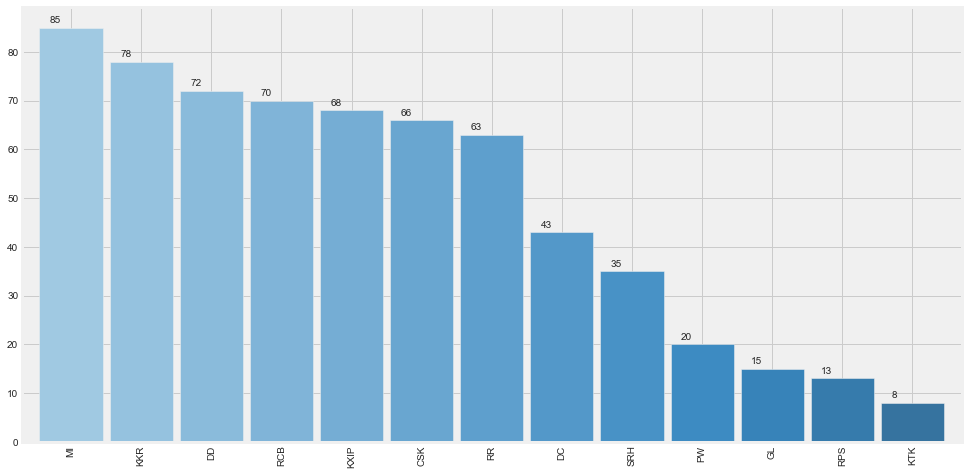

In [28]:
plt.subplots(figsize=(15,8))
ax=match['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('Blues_d',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

### Maximum Man Of Matches 

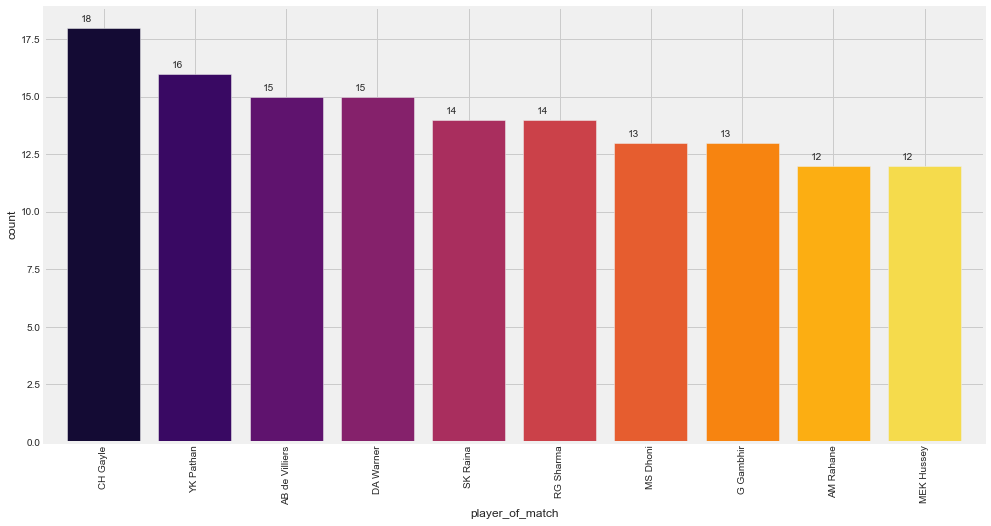

In [29]:
plt.subplots(figsize=(15,8))
#the code used is very basic but gets the job done easily
ax = match['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### Winning Year

In [30]:
for i in range(2008,2017):
    df=((match[match['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


### Top players of the IPL

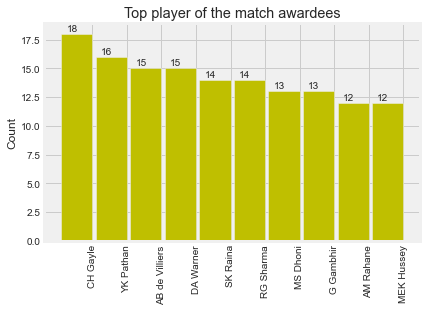

In [31]:
player = match.player_of_match.value_counts()[:10]
labels = np.array(player.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(player), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### Most boundries of the player

<AxesSubplot:xlabel='batsman_runs', ylabel='batsman'>

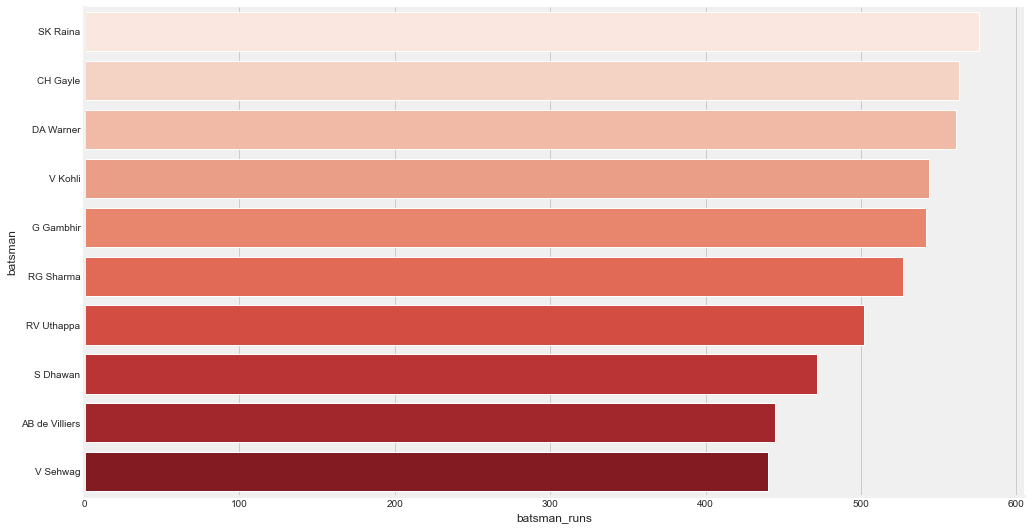

In [32]:
# player with most boundries
data = score[(score['batsman_runs'] == 4) | (score['batsman_runs'] == 6)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')
plt.subplots(figsize=(15,9))
sns.set_style("whitegrid")
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = 'batsman_runs', y = 'batsman', data = data[:10],palette="Reds")